In [1]:
include("functions.jl")

pretty_print_4Darray_matlab_style (generic function with 1 method)

# Initial Condition

In [7]:
using SpecialFunctions

w54 = 18.98013387517992112  # 4th root of the J-Bessel function of order 5
w33 = 13.0152007216984344   # 3rd root of the J-Bessel function of order 5
q1 = 3                      # Oscillation in z.
q2 = 2

u(r, z, th, t) = 10*exp(-((pi*q1)^2 + w33^2)*t) .* sin.(q1*pi*z) .* besselj.(3, w33 .* r) .* sin.(3*th) .+ exp(-((pi*q2)^2 + w54^2)*t) .* sin.(q2*pi*z) .* besselj.(5, w54 .* r) .* cos.(5*th);
finit(r,z,th,t) = u(r,z,th,0);


# Visualizing Coefficients for Different N


(:,:, 1) =

  0.0000  -0.0000i   -0.0000  -0.0000i   -0.0000 +  0.0000i   -0.0000  -0.0000i   -0.0000  -0.0000i    0.0000 +  0.0000i    0.0000 +  0.0000i  
  0.0000 +  0.0000i    0.0000 +  0.1367i   -0.0000  -0.0000i    0.0000 +  0.4204i   -0.0000 +  0.0000i   -0.0000  -0.5571i    0.0000  -0.0000i  
 -0.0000 +  0.0000i    0.0000 +  0.0000i    0.0000  -0.0000i    0.0000 +  0.0000i    0.0000 +  0.0000i   -0.0000  -0.0000i   -0.0000  -0.0000i  
  0.0000 +  0.0000i    0.0000 +  0.0271i   -0.0000  -0.0000i    0.0000 +  0.0835i   -0.0000 +  0.0000i   -0.0000  -0.1106i    0.0000  -0.0000i  
 -0.0000 +  0.0000i    0.0000 +  0.0000i    0.0000  -0.0000i    0.0000 +  0.0000i    0.0000 +  0.0000i   -0.0000  -0.0000i   -0.0000  -0.0000i  
 -0.0000  -0.0000i   -0.0000  -0.1639i    0.0000 +  0.0000i   -0.0000  -0.5038i    0.0000  -0.0000i    0.0000 +  0.6677i   -0.0000 +  0.0000i  
  0.0000  -0.0000i   -0.0000  -0.0000i   -0.0000 +  0.0000i   -0.0000  -0.0000i   -0.0000  -0.0000i    0.0000 +  0.0000

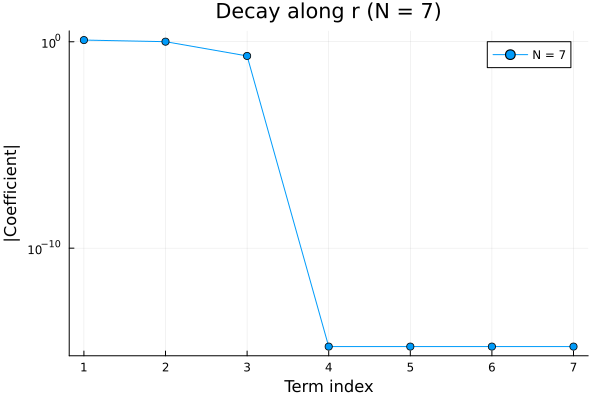

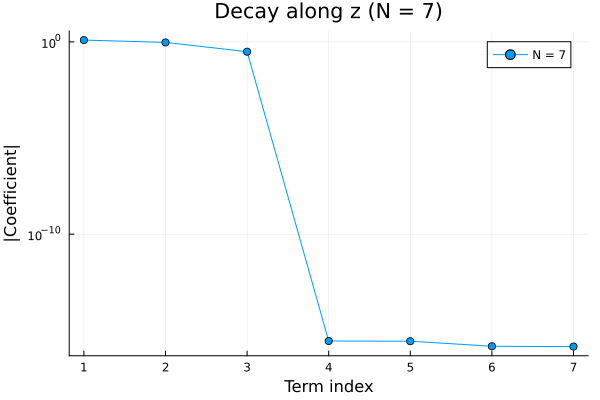

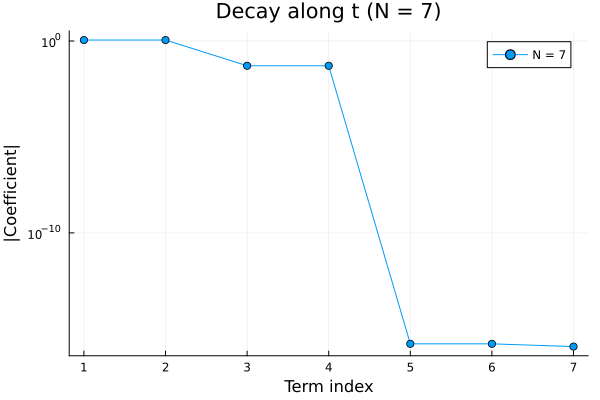

In [ ]:
using Plots

N = 7
T = 200

for curr_N in N
    # generate r, z, t
    r = [cos((pi*k)/(curr_N-1)) for k in (curr_N-1):-1:0]
    z = [cos((pi*k)/(curr_N-1)) for k in (curr_N-1):-1:0]
    t = pi* range(-1,1, length=curr_N+1)[1:end-1]
    t = reshape(t,:,1)

    # generate rr, zz, tt
    rr = [ri for ri in r, zi in z, ti in t]
    zz = [zi for ri in r, zi in z, ti in t]
    tt = [ti for ri in r, zi in z, ti in t]
    rr = dropdims(rr; dims=4)
    zz = dropdims(zz; dims=4) 
    tt = dropdims(tt; dims=4)

    # set initial condition
    curr_CFS = zeros(size(rr))
    for j in 1:curr_N
        curr_CFS[:, j, :] = finit(rr[:,j,:],zz[:,j,:], tt[:,j,:],0)
    end

    # transform to coefficient space
    curr_CFS = V2C_cyl(curr_CFS, "rzt")

    # plot decay along each variable r, z, t
    dims = size(curr_CFS)
    vars = ["r", "z", "t"]

    for (i, var) in enumerate(vars)
        # move curr dimension to front and flatten the rest
        permuted = permutedims(curr_CFS, (i, setdiff(1:3, i)...)) # e.g. if i = 2, setdiff(1:3, 2)... = (1, 3) so this is (2, 1, 3)
        reshaped = reshape(permuted, dims[i], :) # flatten all dimensions except the i dim
        decay = [norm(reshaped[k, :]) for k in 1:dims[i]] # for each row (AKA each coefficient for that term k), take the Euclidean norm of that row vector

        # plot variable decay
        plot(sort(decay, rev=true);  # sort in descending order
            yscale = :log10,
            marker = :circle,
            xlabel = "Term index",
            ylabel = "|Coefficient|",
            label = "N = $curr_N",
            title = "Decay along $var (N = $curr_N)")
        display(current())  # display plots in loop
    end

end